Pivoting data

The pivot function rotates a column and its unique values into a row, and aggregates values as needed. It can also be used to summarize data by categories, filter, sort, group, and create custom calculations. 

pivot(data, column, value, index, aggfunc)
pivot(data, column, value, index, aggfunc, fillna)
pivot(data, column, value, index, aggfunc, fillna, sort)
pivot(data, column, value, index, aggfunc, fillna, sort, dropna)


In [5]:
import pandas as pd
excelample = pd.DataFrame({'Month': ["January", "January", "January", "January", 
                                  "February", "February", "February", "February", 
                                  "March", "March", "March", "March"],
                   'Category': ["Transportation", "Grocery", "Household", "Entertainment",
                                "Transportation", "Grocery", "Household", "Entertainment",
                                "Transportation", "Grocery", "Household", "Entertainment"],
                   'Amount': [74., 235., 175., 100., 115., 240., 225., 125., 90., 260., 200., 120.]})
excelample

,Month,Category,Amount
0,January,Transportation,74.0
1,January,Grocery,235.0
2,January,Household,175.0
3,January,Entertainment,100.0
4,February,Transportation,115.0
5,February,Grocery,240.0
6,February,Household,225.0
7,February,Entertainment,125.0
8,March,Transportation,90.0
9,March,Grocery,260.0


In [6]:
excelample_pivot = excelample.pivot(index="Category", columns="Month", values="Amount")
excelample_pivot

Month,February,January,March
Category,,,
Entertainment,125.0,100.0,120.0
Grocery,240.0,235.0,260.0
Household,225.0,175.0,200.0
Transportation,115.0,74.0,90.0


In [7]:
# sum columns
excelample_pivot.sum(axis=1)

Category
Entertainment     345.0
Grocery           735.0
Household         600.0
Transportation    279.0
dtype: float64

In [8]:
# sum rows
excelample_pivot.sum(axis=0)

Month
February    705.0
January     584.0
March       670.0
dtype: float64

In [9]:
data = pd.read_excel("C:/Users/rammo/OneDrive/Desktop/titanic.xlsx")

data.loc[[1, 3], ["Sex", 'Pclass', 'Fare']]

,Sex,Pclass,Fare
1,female,1,71.2833
3,female,2,53.1000


In [10]:
#data_pivot= data.pivot(index='Pclass', columns='Sex', values='Fare')

#df.pivot(index='Pclass', columns='Sex', values='Survived')

In [11]:
data.pivot_table(index='Sex', columns='Pclass', values='Fare')

Pclass,1,2,3
Sex,,,
female,71.2833,53.1,7.9625
male,NaN,NaN,7.5000


In [12]:
data.pivot_table(index='Sex', columns='Pclass', 
               values='Fare', aggfunc='max')

Pclass,1,2,3
Sex,,,
female,71.2833,53.1,8.00
male,NaN,NaN,8.05


In [13]:
data.pivot_table(index='Sex', columns='Pclass', 
               values='Fare', aggfunc='count')

Pclass,1,2,3
Sex,,,
female,1.0,1.0,2.0
male,NaN,NaN,3.0


In [14]:
#We can also fill missing values using the fill_value parameter.


In [15]:
#There is a shortcut function for a `pivot_table` with a `aggfunc=count` as aggregation: `crosstab`
pd.crosstab(index=data['Sex'], columns=data['Pclass'])

Pclass,1,2,3
Sex,,,
female,1,1,2
male,0,0,3


We can also fill missing values using the fill_value parameter.

EXERCISE:

Make a pivot table with the survival rates (= number of persons survived / total number of persons) for Pclass vs Sex.
Plot the result as a bar plot.

In [16]:
pivot_table = data.pivot_table(index='Pclass', columns='Sex', values='Survived', aggfunc='mean')
print(pivot_table)


Sex     female      male
Pclass                  
1          1.0       NaN
2          1.0       NaN
3          1.0  0.333333


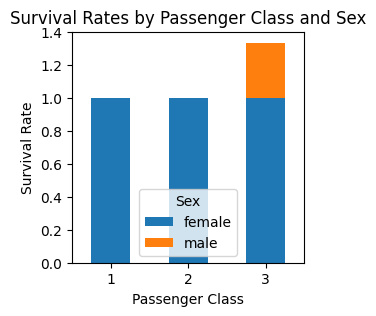

In [17]:
# Plotting the pivot table

import matplotlib.pyplot as plt
pivot_table.plot(kind='bar', stacked=True,figsize=(3,3))

# Adding labels and title
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rates by Passenger Class and Sex')
plt.xticks(rotation=0)

# Display the plot
plt.legend(title='Sex')
plt.show()


EXERCISE:

Make a table of the median Fare payed by aged/underaged vs Sex.

In [18]:
# Define a function to categorize age groups
def categorize_age(age):
    if age >= 18:
        return 'Aged'
    else:
        return 'Underaged'

# Apply the categorization function to create a new column 'AgeGroup'
data['AgeGroup'] = data['Age'].apply(categorize_age)

# Create a pivot table to calculate median Fare by AgeGroup and Sex
median_fare_table = data.pivot_table(index='AgeGroup', columns='Sex', values='Fare', aggfunc='median')

# Display the resulting table
print("Median Fare by Age Group and Sex:")
print(median_fare_table)

Median Fare by Age Group and Sex:
Sex       female  male
AgeGroup              
Aged       30.55  7.25


MELT


The melt function performs the inverse operation of a pivot. This can be used to make your frame longer, i.e. to make a tidy version of your data.

In [20]:
pivoted = data.pivot_table(index='Sex', columns='Pclass', values='Fare').reset_index()
pivoted.columns.name = None

In [21]:
pivoted

,Sex,1,2,3
0,female,71.2833,53.1,7.9625
1,male,NaN,NaN,7.5000


In [22]:
pd.melt(pivoted)

,variable,value
0,Sex,female
1,Sex,male
2,1,71.2833
3,1,NaN
4,2,53.1
5,2,NaN
6,3,7.9625
7,3,7.5


As you can see above, the melt function puts all column labels in one column, and all values in a second column.

In this case, this is not fully what we want. We would like to keep the 'Sex' column separately:

In [23]:
pd.melt(pivoted, id_vars=['Sex']) #, var_name='Pclass', value_name='Fare')

,Sex,variable,value
0,female,1,71.2833
1,male,1,NaN
2,female,2,53.1000
3,male,2,NaN
4,female,3,7.9625
5,male,3,7.5000


Reshaping with stack and unstack

![alt text](image-2.png)

In [24]:
df = pd.DataFrame({'A':['one', 'one', 'two', 'two'], 
                   'B':['a', 'b', 'a', 'b'], 
                   'C':range(4)})
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3


In [25]:
df = df.set_index(['A', 'B']) # Indeed, you can combine two indices
df

C
A   B   
one a  0
    b  1
two a  2
    b  3

In [26]:
result = df['C'].unstack()
result

B,a,b
A,,
one,0,1
two,2,3


In [27]:
df = result.stack().reset_index(name='C')
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3


**stack**: make your data *longer* and *smaller*
**unstack**: make your data *shorter* and *wider*

Mimick pivot table
To better understand and reason about pivot tables, we can express this method as a combination of more basic steps. In short, the pivot is a convenient way of expressing the combination of a groupby and stack/unstack.

In [ ]:
df = pd.read_csv("data/titanic.csv")
df.head()
df.pivot_table(index='Pclass', columns='Sex', 
               values='Survived', aggfunc='mean')

EXERCISE:

Get the same result as above based on a combination of `groupby` and `unstack`
First use `groupby` to calculate the survival ratio for all groups
Then, use `unstack` to reshape the output of the groupby operation
